###Installing Dependencies

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.2 MB/s 


###import statements

In [ ]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report

###Reading Data

In [ ]:
#Getting data from GITHUB
url ="https://raw.githubusercontent.com/Venkatadivya/A-Study-of-Amazon-Products-Product-Reviews-Product-Popularity-Review-Sentiment-and-Market-Baske/main/Amazon_reviews.csv"

In [ ]:
#Reading csv using pandas

review = pd.read_csv(url)

print ("The shape of the  data is (row, column):"+ str(review.shape))

print (review.info())


The shape of the  data is (row, column):(50001, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DOC_ID             50001 non-null  int64  
 1   LABEL              50001 non-null  object 
 2   USERID             50001 non-null  object 
 3   PRODUCT_ID         50001 non-null  object 
 4   VERIFIED_PURCHASE  50001 non-null  object 
 5   RATING             50001 non-null  float64
 6   PRODUCT_CATEGORY   50001 non-null  object 
 7   PRODUCT_TITLE      50001 non-null  object 
 8   REVIEW_TITLE       50001 non-null  object 
 9   REVIEW_TEXT        50001 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.8+ MB
None


In [ ]:
review.head()

,DOC_ID,LABEL,USERID,PRODUCT_ID,VERIFIED_PURCHASE,RATING,PRODUCT_CATEGORY,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,A39HTATAQ9V7YF,B00008NG7N,N,4.0,PC,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,A3JM6GV9MNOF9X,B00LH0Y3NM,Y,4.0,Wireless,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,A1Z513UWSAAO0F,B000I5UZ1Q,N,3.0,Baby,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,A1WMRR494NWEWV,B003822IRA,N,4.0,Office Products,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,A3IAAVS479H7M7,B00PWSAXAM,N,4.0,Beauty,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [ ]:
#Creating a copy
process_reviews=review.copy()

#Checking for null values
process_reviews.isnull().sum()

DOC_ID               0
LABEL                0
USERID               0
PRODUCT_ID           0
VERIFIED_PURCHASE    0
RATING               0
PRODUCT_CATEGORY     0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

In [ ]:
#dropping few labels
process_reviews=process_reviews.drop(['LABEL','DOC_ID', 'PRODUCT_ID'], axis=1)

process_reviews.head()

,USERID,VERIFIED_PURCHASE,RATING,PRODUCT_CATEGORY,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,A39HTATAQ9V7YF,N,4.0,PC,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,A3JM6GV9MNOF9X,Y,4.0,Wireless,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,A1Z513UWSAAO0F,N,3.0,Baby,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,A1WMRR494NWEWV,N,4.0,Office Products,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,A3IAAVS479H7M7,N,4.0,Beauty,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [ ]:
#calculating total no; of rating
process_reviews['RATING'].value_counts()


5.0    31703
4.0    10344
3.0     3354
1.0     2764
2.0     1834
2.5        1
3.5        1
Name: RATING, dtype: int64

In [ ]:
def set_review(exp):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if exp['RATING'] == 3.0:
        value = 'Neutral'
    elif exp['RATING'] <= 2.0:
        value = 'Negative'
    elif exp['RATING'] >= 4.0:
        value = 'Positive'
    else:
        value = -1
    return value

In [ ]:
#Applying the function in our new column
process_reviews['Response'] = process_reviews.apply(set_review, axis=1)

process_reviews.head()

,USERID,VERIFIED_PURCHASE,RATING,PRODUCT_CATEGORY,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,Response
0,A39HTATAQ9V7YF,N,4.0,PC,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",Positive
1,A3JM6GV9MNOF9X,Y,4.0,Wireless,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,Positive
2,A1Z513UWSAAO0F,N,3.0,Baby,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,Neutral
3,A1WMRR494NWEWV,N,4.0,Office Products,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,Positive
4,A3IAAVS479H7M7,N,4.0,Beauty,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,Positive


In [ ]:
process_reviews['Response'].value_counts()


Positive    42047
Negative     4598
Neutral      3354
-1              2
Name: Response, dtype: int64

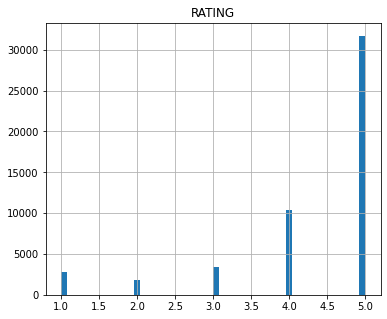

In [ ]:
#histogram Plot
process_reviews.hist(bins=50, figsize=(6,5)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

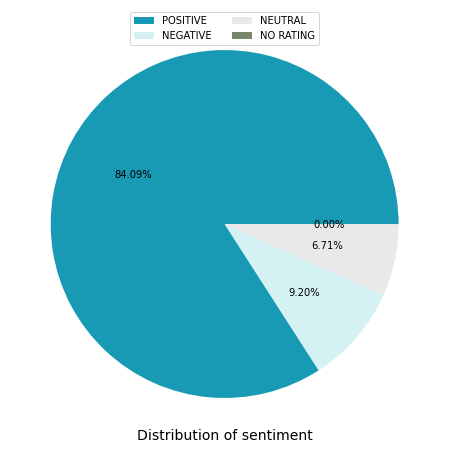

In [ ]:
# distribution of sentiment as pie chart
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE','NEUTRAL','NO RATING']
colors = ['#189AB4', '#D4F1F4','#e9e9e9','#78866b']
plt.pie(process_reviews['Response'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()


# Lexicon VADER

In [ ]:
# processing data for Vader
vader_data=process_reviews.copy()
vader_data=vader_data.drop(['USERID','VERIFIED_PURCHASE', 'PRODUCT_CATEGORY','PRODUCT_TITLE'], axis=1)
vader_data.head(5)

,RATING,REVIEW_TITLE,REVIEW_TEXT,Response
0,4.0,useful,"When least you think so, this product will sav...",Positive
1,4.0,New era for batteries,Lithium batteries are something new introduced...,Positive
2,3.0,doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,Neutral
3,4.0,Great computing!,I was looking for an inexpensive desk calcolat...,Positive
4,4.0,Only use twice a week,I only use it twice a week and the results are...,Positive


In [ ]:
#applying SentimentIntensityAnalyzer method to calculate the score
analyser = SentimentIntensityAnalyzer()
for sentence in vader_data['REVIEW_TEXT'][:5]:
    vs = analyser.polarity_scores(sentence)
    print("{:-<65} {} \n {}".format(sentence, '---------------->' , str(vs)))
    print(' ')


When least you think so, this product will save the day. Just keep it around just in case you need it for something. ----------------> 
 {'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.4939}
 
Lithium batteries are something new introduced in the market there average developing cost is relatively high but Stallion doesn't compromise on quality and provides us with the best at a low cost.<br />There are so many in built technical assistants that act like a sensor in their particular forté. The battery keeps my phone charged up and it works at every voltage and a high voltage is never risked. ----------------> 
 {'neg': 0.061, 'neu': 0.801, 'pos': 0.138, 'compound': 0.8019}
 
I purchased this swing for my baby. She is 6 months now and has pretty much out grown it. It is very loud and doesn't swing very well. It is beautiful though. I love the colors and it has a lot of settings, but I don't think it was worth the money. ----------------> 
 {'neg': 0.026, 'neu': 0.81, 'pos': 0.164,

In [ ]:
#calculating score using polarity
def calculate_sentiment_scores(sentence):
    sntmnt = analyser.polarity_scores(sentence)['compound']
    return(sntmnt)

In [ ]:
eng_snt_score =  []

for comment in vader_data.REVIEW_TEXT.to_list():
    snts_score = calculate_sentiment_scores(comment)
    eng_snt_score.append(snts_score)

In [ ]:

vader_data['scores'] = vader_data['REVIEW_TEXT'].apply(lambda REVIEW_TEXT:analyser.polarity_scores(REVIEW_TEXT))
vader_data['compound_score'] = np.array(eng_snt_score)
vader_data.head(5)

,RATING,REVIEW_TITLE,REVIEW_TEXT,Response,scores,compound_score
0,4.0,useful,"When least you think so, this product will sav...",Positive,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...",0.4939
1,4.0,New era for batteries,Lithium batteries are something new introduced...,Positive,"{'neg': 0.061, 'neu': 0.801, 'pos': 0.138, 'co...",0.8019
2,3.0,doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,Neutral,"{'neg': 0.026, 'neu': 0.81, 'pos': 0.164, 'com...",0.7897
3,4.0,Great computing!,I was looking for an inexpensive desk calcolat...,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,4.0,Only use twice a week,I only use it twice a week and the results are...,Positive,"{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'comp...",0.7964


In [ ]:
#assigning values based on compound score
i = 0

vader_sentiment = [ ]

while(i<len(vader_data)):
    if ((vader_data.iloc[i]['compound_score'] >= 0.05)):
        vader_sentiment.append('positive')
        i = i+1
    elif ((vader_data.iloc[i]['compound_score'] > -0.05) & (vader_data.iloc[i]['compound_score'] < 0.05)):
        vader_sentiment.append('neutral')
        i = i+1
    elif ((vader_data.iloc[i]['compound_score'] <= -0.05)):
        vader_sentiment.append('negative')
        i = i+1

In [ ]:
import seaborn as sns


In [ ]:
vader_data['vader_response'] = vader_sentiment

In [ ]:
vader_data['actual_score'] = vader_data['Response'].map({'Positive': 1, 'Neutral': 0, 'Negative':-1})
vader_data['predicted_score'] = vader_data['vader_response'].map({'positive': 1, 'neutral': 0, 'negative':-1})

vader_data.head()

,RATING,REVIEW_TITLE,REVIEW_TEXT,Response,scores,compound_score,vader_response,actual_score,predicted_score
0,4.0,useful,"When least you think so, this product will sav...",Positive,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...",0.4939,positive,1.0,1
1,4.0,New era for batteries,Lithium batteries are something new introduced...,Positive,"{'neg': 0.061, 'neu': 0.801, 'pos': 0.138, 'co...",0.8019,positive,1.0,1
2,3.0,doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,Neutral,"{'neg': 0.026, 'neu': 0.81, 'pos': 0.164, 'com...",0.7897,positive,0.0,1
3,4.0,Great computing!,I was looking for an inexpensive desk calcolat...,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,1.0,0
4,4.0,Only use twice a week,I only use it twice a week and the results are...,Positive,"{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'comp...",0.7964,positive,1.0,1


In [ ]:
#dropping null values
vader_data1 = vader_data.dropna()
vader_data1.isnull().values.sum()


0

In [ ]:
from sklearn.metrics import accuracy_score
y_act = vader_data1['actual_score'].values
y_pred = vader_data1['predicted_score'].values
#verifying the accuracy score
accuracy_score(y_act,y_pred)

0.8147962959259185

###Result Report

In [ ]:
res =classification_report(y_act,y_pred)
print(res)

              precision    recall  f1-score   support

        -1.0       0.49      0.50      0.49      4598
         0.0       0.11      0.11      0.11      3354
         1.0       0.90      0.91      0.90     42047

    accuracy                           0.81     49999
   macro avg       0.50      0.50      0.50     49999
weighted avg       0.81      0.81      0.81     49999



#RECOMMENDER SYSTEM

###Product Popularity

In [ ]:
#block to get list of most used products based on rating
popular_products = pd.DataFrame(review.groupby('PRODUCT_CATEGORY')['RATING'].count())
most_products = popular_products.sort_values('RATING', ascending=False)
print(most_products)

                                                    RATING
PRODUCT_CATEGORY                                          
Health & Beauty                                      12071
Fire Tablets,Tablets,Computers & Tablets,All Ta...   10966
Electronics,iPad & Tablets,All Tablets,Fire Tab...    2814
Toys & Games,Electronics                              1676
Electronics                                            703
Shoes                                                  700
Grocery                                                700
Health & Personal Care                                 700
Home                                                   700
Home Entertainment                                     700
Furniture                                              700
Home Improvement                                       700
Jewelry                                                700
PC                                                     700
Outdoors                                               7

In [ ]:
#treemap view of most used products
review["categories"] = "categories" # to have a same origin

fig = px.treemap(review.head(50), path=['categories', "PRODUCT_CATEGORY"], values='RATING',
                  color=review["RATING"].head(50), hover_data=['PRODUCT_CATEGORY'],
                  color_continuous_scale='Blues',
                  )
fig.show()

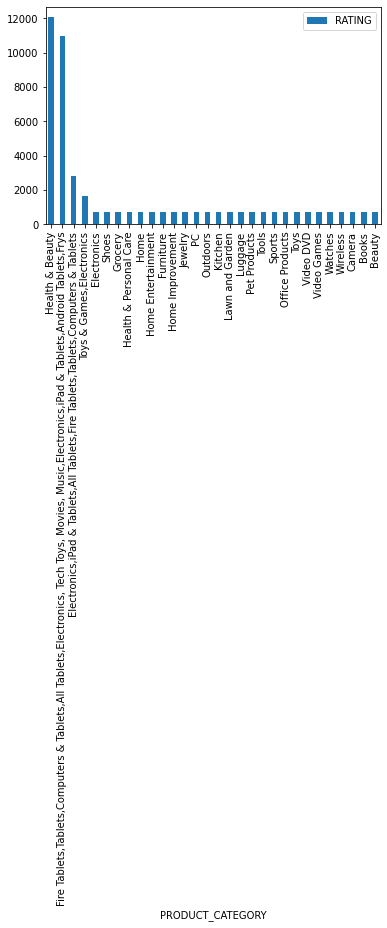

In [ ]:
#bar plotting
most_products.head(30).plot(kind = "bar")

In [ ]:
popular_products_VP = pd.DataFrame(review.groupby('PRODUCT_ID')['VERIFIED_PURCHASE'].count())
most_products_VP = popular_products_VP.sort_values('VERIFIED_PURCHASE', ascending=False)
print(most_products_VP)

            VERIFIED_PURCHASE
PRODUCT_ID                   
B0000YUXI0               2143
B00006IV2F                704
B0000632EN                686
B0000CC64W                590
B00005O0MZ                586
...                       ...
B003CLIPHO                  1
B003CMUXV4                  1
B003CN5NKY                  1
B003CNOUWQ                  1
B012D9DB9W                  1

[19977 rows x 1 columns]


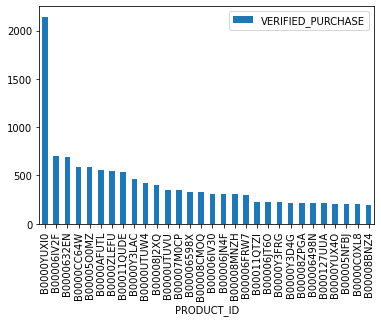

In [ ]:
#bar plotting
most_products_VP.head(30).plot(kind = "bar")

### Collborative Filter

In [ ]:
#taking first 15000 rows to fit in matrix
review1 = review.head(15000)

In [ ]:
utility_matrix = review1.pivot_table(values='RATING', index='USERID', columns='PRODUCT_CATEGORY', fill_value=0)
utility_matrix.head()

PRODUCT_CATEGORY,Apparel,Automotive,Baby,Beauty,Books,Camera,Electronics,Furniture,Grocery,Health & Personal Care,...,PC,Pet Products,Shoes,Sports,Tools,Toys,Video DVD,Video Games,Watches,Wireless
USERID,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0
A00473363TJ8YSZ3YAGG9,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0,0,0.0,0.0,4,0.0,0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,4.0,0,0.0,0,0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0


In [ ]:
#shape of Matrix
utility_matrix.shape

(14410, 30)

In [ ]:
#transpose of matrix
rs = utility_matrix.T
rs.head()



USERID,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A06298653TJ91G7R7MD6R,A065995424G4KBBX1V8BO,...,AZYQEFB9Y5N22,AZZ5ENX41WOYZ,AZZ8A0TEQOD7J,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
PRODUCT_CATEGORY,,,,,,,,,,,,,,,,,,,,,
Apparel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Automotive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baby,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
Beauty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Books,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("Shape of Reviews data after transpose",rs.shape)

Shape of Reviews data after transpose (30, 14410)


In [ ]:
rs1 = rs

In [ ]:
#Dimensionality reduction using truncated SVD (aka LSA).
#applying svd with 20 components to get desired dimensionality of output data

LSA = TruncatedSVD(n_components=20)
decomposed_matrix = LSA.fit_transform(rs1)
decomposed_matrix.shape

(30, 20)

###Correlation Matrix

In [ ]:
#to get returns the normalised covariance matrix

correlation_coeff = np.corrcoef(decomposed_matrix)
correlation_coeff.shape

(30, 30)

In [ ]:
#testing our matrix method
testuser1 = rs1.index[8]
print("Index of 8:",testuser1,'\n')

product_names = list(rs1.index)
PRODUCT_category1 = product_names.index(testuser1)
PRODUCT_category1

Index of 8: Grocery 



8

In [ ]:
testuser2 = rs1.index[27]
print("Index of 27:",testuser2,'\n')

product_names = list(rs1.index)
PRODUCT_category2 = product_names.index(testuser2)
PRODUCT_category2

Index of 27: Video Games 



27

In [ ]:

correlation_product_category = correlation_coeff[PRODUCT_category2]
correlation_product_category.shape

(30,)

In [ ]:
#predicting the list of highly recommened categories in amazon 
Recommend = list(rs.index[correlation_product_category > 0])

# Removes the item already bought by the customer
Recommend.remove(testuser2) 

Recommend[0:9]



['Apparel',
 'Baby',
 'Beauty',
 'Camera',
 'Electronics',
 'Furniture',
 'Grocery',
 'Health & Personal Care',
 'Home']

In [ ]:
#showing the list of items bought in highly recommended category
result = review[review['PRODUCT_CATEGORY'] == 'Baby']
print(result['PRODUCT_TITLE'])

2             Fisher-Price Papasan Cradle Swing, Starlight
30            green sprouts Spout Adapter for Water Bottle
59       Car Sun Shade (2 Pack) with static cling. Bloc...
72                       Medela Harmony Manual Breast Pump
134      Carters Super Soft Bumper, White (Discontinued...
                               ...                        
20003    Playskool Weebles Art 2 Pack - Boy & Girl by B...
20018    Kinderglo Portable Fun and Safe Rechargeable N...
20046    OXO Tot PerfectPull Wipes Dispenser with Weigh...
20085                   Prince Lionheart Jumbo Toy Hammock
20097    Booginhead PaciGrip Pacifier Holder, Blue Pins...
Name: PRODUCT_TITLE, Length: 700, dtype: object


# Assosication Rule Minig

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
#preparing a group 
ARM_Data = review.groupby(['PRODUCT_CATEGORY', 'USERID'])['PRODUCT_TITLE'].count().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)
ARM_Data.head()

USERID,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A01456542S5QPYUEGJXR8,A01907982I6OHXDYN5HD6,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A02693342D4WEEY3LWSZ9,A02705761H0YNK5IS0LUC,A03056581JJIOL5FSKJY7,...,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZIVXTL3ZPB7,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZSAMMJPJKJ1,AZZTJQ7CQZUD8,AZZVCBG5G4EV8,AZZWPNME0GQZ2
PRODUCT_CATEGORY,,,,,,,,,,,,,,,,,,,,,
"Amazon Devices & Accessories,Amazon Device Accessories,Power Adapters & Cables,Kindle Store,Kindle E-Reader Accessories,Kindle Paperwhite Accessories",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animals & Pet Supplies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apparel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Automotive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Baby,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#applying apriori algorithm
frequent_products = apriori(ARM_Data, min_support=0.06,  use_colnames=True) 
frequent_products.head()

,support,itemsets
0,0.115385,(A132ETQPMHQ585)
1,0.076923,(A13IRKEEPFTWFM)
2,0.076923,(A13STKDYQO5DQ8)
3,0.076923,(A146H6A41B26QT)
4,0.076923,(A17W4YG9W016T1)


In [ ]:
#getting support score & and clustering the data
#implementation
#For easier filtering, the length column has been introduced.

frequent_products.sort_values("support", ascending=False)
frequent_products['length'] = frequent_products['itemsets'].apply(lambda x: len(x))
frequent_products

,support,itemsets,length
0,0.115385,(A132ETQPMHQ585),1
1,0.076923,(A13IRKEEPFTWFM),1
2,0.076923,(A13STKDYQO5DQ8),1
3,0.076923,(A146H6A41B26QT),1
4,0.076923,(A17W4YG9W016T1),1
...,...,...,...
179,0.076923,"(A1Z54EM24Y40LL, A3M174IC0VXOS2, A324GIXX5SIYGA)",3
180,0.076923,"(A22ZFXQE8AWPEP, A22VW0P4VZHDE3, A281NPSIMI1C2R)",3
181,0.076923,"(A2B7BUH8834Y6M, A3M174IC0VXOS2, A281NPSIMI1C2R)",3
182,0.076923,"(A3S3R88HA0HZG3, A3M174IC0VXOS2, A281NPSIMI1C2R)",3


In [ ]:
#frequent users with length of purchasing two products
frequent_products[ (frequent_products['length'] == 2) &
                   (frequent_products['support'] >= 0.05) ]

,support,itemsets,length
96,0.076923,"(A1Z54EM24Y40LL, A132ETQPMHQ585)",2
97,0.115385,"(A132ETQPMHQ585, A281NPSIMI1C2R)",2
98,0.076923,"(A17W4YG9W016T1, A281NPSIMI1C2R)",2
99,0.096154,"(A1Z54EM24Y40LL, A1A4E96DXPO0EN)",2
100,0.076923,"(A1A4E96DXPO0EN, A281NPSIMI1C2R)",2
...,...,...,...
164,0.115385,"(A3S3R88HA0HZG3, A3M174IC0VXOS2)",2
165,0.096154,"(A3M174IC0VXOS2, AB1TXTH9KT4YM)",2
166,0.076923,"(A3M174IC0VXOS2, AK7CAW3N1XZV6)",2
167,0.076923,"(AXJTNYD3UK1BP, A3M174IC0VXOS2)",2


In [ ]:
#frequent users with length of purchasing 3&4 products at  a time

frequent_products[ (frequent_products['length'] >= 3) ].tail()


,support,itemsets,length
179,0.076923,"(A1Z54EM24Y40LL, A3M174IC0VXOS2, A324GIXX5SIYGA)",3
180,0.076923,"(A22ZFXQE8AWPEP, A22VW0P4VZHDE3, A281NPSIMI1C2R)",3
181,0.076923,"(A2B7BUH8834Y6M, A3M174IC0VXOS2, A281NPSIMI1C2R)",3
182,0.076923,"(A3S3R88HA0HZG3, A3M174IC0VXOS2, A281NPSIMI1C2R)",3
183,0.076923,"(A1Z54EM24Y40LL, A2B7BUH8834Y6M, A3M174IC0VXOS...",4


In [ ]:
#calculating lift
a_r = association_rules(frequent_products, metric="lift", min_threshold=1.3)
a_r["antecedents_length"] = a_r["antecedents"].apply(lambda x: len(x))
a_r["consequents_length"] = a_r["consequents"].apply(lambda x: len(x))
a_r.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
209,(A22VW0P4VZHDE3),"(A22ZFXQE8AWPEP, A281NPSIMI1C2R)",0.096154,0.076923,0.076923,0.800000,10.400000,0.069527,4.615385,1,2
206,"(A22ZFXQE8AWPEP, A281NPSIMI1C2R)",(A22VW0P4VZHDE3),0.076923,0.096154,0.076923,1.000000,10.400000,0.069527,inf,2,1
199,"(A1Z54EM24Y40LL, A3M174IC0VXOS2)",(A324GIXX5SIYGA),0.115385,0.076923,0.076923,0.666667,8.666667,0.068047,2.769231,2,1
204,(A324GIXX5SIYGA),"(A1Z54EM24Y40LL, A3M174IC0VXOS2)",0.076923,0.115385,0.076923,1.000000,8.666667,0.068047,inf,1,2
207,"(A22VW0P4VZHDE3, A281NPSIMI1C2R)",(A22ZFXQE8AWPEP),0.096154,0.096154,0.076923,0.800000,8.320000,0.067678,4.519231,2,1
...,...,...,...,...,...,...,...,...,...,...,...
191,(A3M174IC0VXOS2),"(A1Z54EM24Y40LL, A281NPSIMI1C2R)",0.307692,0.173077,0.076923,0.250000,1.444444,0.023669,1.102564,1,2
188,"(A1Z54EM24Y40LL, A281NPSIMI1C2R)",(A3M174IC0VXOS2),0.173077,0.307692,0.076923,0.444444,1.444444,0.023669,1.246154,2,1
23,(A281NPSIMI1C2R),(A1L43KWWR05PCS),0.403846,0.134615,0.076923,0.190476,1.414966,0.022559,1.069005,1,1
22,(A1L43KWWR05PCS),(A281NPSIMI1C2R),0.134615,0.403846,0.076923,0.571429,1.414966,0.022559,1.391026,1,1


In [ ]:
#sorting confidence 
a_r.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
165,"(A1L43KWWR05PCS, AK7CAW3N1XZV6)",(A1Z54EM24Y40LL),0.076923,0.250000,0.076923,1.000000,4.000000,0.057692,inf,2,1
205,"(A22ZFXQE8AWPEP, A22VW0P4VZHDE3)",(A281NPSIMI1C2R),0.076923,0.403846,0.076923,1.000000,2.476190,0.045858,inf,2,1
226,"(A2B7BUH8834Y6M, A3M174IC0VXOS2, A281NPSIMI1C2R)",(A1Z54EM24Y40LL),0.076923,0.250000,0.076923,1.000000,4.000000,0.057692,inf,3,1
201,"(A3M174IC0VXOS2, A324GIXX5SIYGA)",(A1Z54EM24Y40LL),0.076923,0.250000,0.076923,1.000000,4.000000,0.057692,inf,2,1
84,(A2N69DJM8NVYZ6),(A281NPSIMI1C2R),0.076923,0.403846,0.076923,1.000000,2.476190,0.045858,inf,1,1
...,...,...,...,...,...,...,...,...,...,...,...
89,(A281NPSIMI1C2R),(A2VOGNBUMXSW13),0.403846,0.115385,0.076923,0.190476,1.650794,0.030325,1.092760,1,1
85,(A281NPSIMI1C2R),(A2N69DJM8NVYZ6),0.403846,0.076923,0.076923,0.190476,2.476190,0.045858,1.140271,1,1
79,(A281NPSIMI1C2R),(A2FWDBKX76ILA7),0.403846,0.076923,0.076923,0.190476,2.476190,0.045858,1.140271,1,1
71,(A281NPSIMI1C2R),(A24N4FKHGD7DWT),0.403846,0.076923,0.076923,0.190476,2.476190,0.045858,1.140271,1,1


##References

* Hgultekin. (2020, July 20). Lexicon based sentiment analysis with vader. 
Kaggle. Retrieved August 18, 2022, from https://www.kaggle.com/code/hgultekin/lexicon-based-sentiment-analysis-with-vader/notebook 

* VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text
(by C.J. Hutto and Eric Gilbert)
Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

* Shawamar. (2019, August 30). Product recommendation system for e-commerce. Kaggle. Retrieved August 18, 2022, from https://www.kaggle.com/code/shawamar/product-recommendation-system-for-e-commerce 

* Evrenermis. (2020, June 28). Association Rule Based Learning explained. Kaggle. Retrieved August 24, 2022, from https://www.kaggle.com/code/evrenermis/association-rule-based-learning-explained/notebook 

* sasha18. (2020, August 12). Perform market basket analysis with E-comm Data. Kaggle. Retrieved August 24, 2022, from https://www.kaggle.com/code/sasha18/perform-market-basket-analysis-with-e-comm-data/notebook 